# Exercise 1
### Simulating a particle in a 1-dimensional static potential

To get started, we want to be able to simulate the stochastic trajectory of a particle in a one-dimensional potential.
To this end, let's consider the potential 
$$\phi(x;\tau) = \frac{1}{4} x^4 - x^2 + \tau x$$
where we fix the value of $\tau$ so that the landscape is static.
We will assume that the there is a constant diffusion coefficient $D$ that governs the level of noise $\sigma$ in the system, according to $\sigma=\sqrt{2D}$.
This is an example of *additive* noise, or noise that is independent of position and time.

Tasks:
* Plot the landscape $\phi(x;\tau)$ for a specific value of $\tau$ using numpy and matplotlib.
* Calculate the drift function according to $f(t,x) = -\nabla_x \phi(x;\tau)$
* Use `diffrax` to simulate a particle in that landscape over an interval of time $t\in[0, t_{fin}]$.
* Plot the trajectory of that particle as a function of time.
* Experiment with increasing the level of noise $\sigma=\sqrt{2D}$ in the system, and 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import jax.random as jrandom

import diffrax as dfrx
import equinox as eqx

In [2]:
SEED = None

# Random number generators
rng = np.random.default_rng(seed=SEED)
key = jrandom.PRNGKey(seed=rng.integers(2**32))

In [3]:
from diffrax import diffeqsolve, ControlTerm, Euler, MultiTerm, ODETerm, SaveAt, VirtualBrownianTree

t0 = 0  # Start time
t1 = 10  # End time

y0 = 1.0  # Initial condition

ts_save = np.linspace(t0, t1, 101)  # Timepoints to save at

# Noise level computed based on the diffusion constant
diffusivity = 0.1  
sigma = np.sqrt(2 * diffusivity)

def drift(t, y, args):
    # [TODO: YOUR CODE HERE]
    dydt = -y  # <-- this is just a placeholder, and not correct!
    return dydt

def diffusion(t, y, args):
    return sigma

# This brownian motion specifies ONE possible set of random "hits"
brownian_motion = VirtualBrownianTree(
    t0, t1, tol=1e-3, 
    shape=(), 
    key=key
)

terms = MultiTerm(ODETerm(drift), ControlTerm(diffusion, brownian_motion))
solver = Euler()  # What solver to use
saveat = SaveAt(ts=ts_save)  # What timepoints to save at

sol = diffeqsolve(
    terms, 
    solver, 
    t0, t1, 
    dt0=0.05, # initial timestep
    y0=y0, 
    saveat=saveat
)

print(sol.ys)

[ 1.          0.96946626  1.1843366   1.09855389  0.88234448  0.79657988
  0.81356398  0.71315866  0.74269082  0.56736605  0.35866387  0.30847273
  0.17686098  0.15993545  0.21119397  0.26553214  0.35621994  0.48404323
  0.3233532   0.21050115  0.20553098  0.31960207  0.32781104  0.50163888
  0.30727337  0.32317281  0.12885931  0.06581656  0.12000918  0.17082166
  0.13679584  0.17528727 -0.07215626  0.199805   -0.02159135 -0.02461016
 -0.06452272  0.22695375  0.25374692  0.07467757  0.23042081  0.0599992
 -0.13599884 -0.21737542 -0.38828073 -0.48307172 -0.35813343 -0.23484658
 -0.05872466 -0.05077067 -0.1242141  -0.09721221 -0.03247719  0.20893146
  0.20793914  0.18969358  0.27365     0.30172664  0.2842991   0.1722106
  0.27856388  0.21983062  0.16497079  0.10879835  0.13530623 -0.03823356
  0.10770179  0.17226063  0.16623631  0.21578462  0.20577785  0.15052944
 -0.11253412 -0.30699779 -0.24437398 -0.5417648  -0.29182009  0.01724764
 -0.02861544  0.10148805  0.04872695  0.05683128  0.2

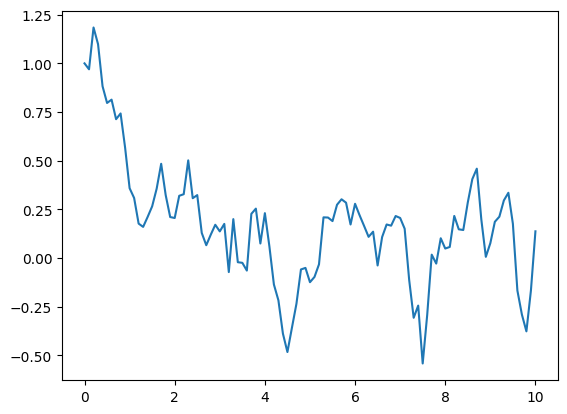

In [4]:
# Plot results

fig, ax = plt.subplots(1, 1)

ax.plot(sol.ts, sol.ys);